In [1]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creating a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Adding the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-80.68171609615108 -136.33719863418187
84.75216376928375 49.74863182944634
13.525032757002364 39.09531769606437
-86.18707060408694 -167.97311888195222
20.371491090594205 46.99367079032854
-61.088349912990964 74.89882606987584
-78.66405449731637 -143.8374672278451
-62.7488656810089 -35.51491596893115
71.75768881720421 -134.56476323922152
4.808454944490677 -163.46219575902305
-71.35516655189 151.5040430001369
-40.09545989312896 51.259691061196975
-63.3908871789684 -138.9988974798659
-67.50822289026621 -126.99663195942946
36.12497720889233 135.68122761828266
-62.74243929679998 38.73028119047291
-43.594257482120526 -89.06223379909422
-0.7559512473501258 47.96731307102567
-7.975219304145966 -130.84444364040655
49.73546317511216 128.2280262806346
-25.38098418741835 -5.862881177653918
78.31335396068275 42.31285987654422
-71.12291866022072 59.32458084483875
-53.929586196731336 -1.439744931237044
-64.07894295593681 126.72569200111604
24.19338102359302 -157.09683043313552
27.524636600068433 -107

In [5]:
from citipy import citipy

# Creating a list for holding the cities
cities = []

# Identifying the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm the sufficient count
len(cities)

651

In [6]:
# Importing the requests library
import requests

# Importing the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime 

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | najran
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | mikuni
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | mogadishu
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | konstantinovka
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | 

Processing Record 39 of Set 4 | salekhard
Processing Record 40 of Set 4 | buraydah
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | havelock
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 4 | chicama
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | necochea
Processing Record 49 of Set 4 | warqla
City not found. Skipping...
Processing Record 50 of Set 4 | cheremukhovo
Processing Record 1 of Set 5 | tulungagung
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | misratah
Processing Record 5 of Set 5 | teya
Processing Record 6 of Set 5 | sao jose da coroa grande
Processing Record 7 of Set 5 | martil
Processing Record 8 of Set 5 | akhmim
Processing Record 9 of Set 5 | sitka
Processing Record 10 of Set 5 | maltahohe
Processing Record 11 of Set 5 | zeya
Proc

Processing Record 26 of Set 8 | ingham
Processing Record 27 of Set 8 | finschhafen
Processing Record 28 of Set 8 | crasna
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | taoudenni
Processing Record 31 of Set 8 | kupang
Processing Record 32 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | rochegda
Processing Record 35 of Set 8 | mineiros
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | christchurch
Processing Record 39 of Set 8 | leshukonskoye
Processing Record 40 of Set 8 | baruun-urt
Processing Record 41 of Set 8 | esteli
Processing Record 42 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 8 | teknaf
Processing Record 44 of Set 8 | port hedland
Processing Record 45 of Set 8 | faya
Processing Record 46 of Set 8 | qaqortoq
Processing Record 47 of Set 8 | cap malheureux
Processing Record 48 o

City not found. Skipping...
Processing Record 12 of Set 12 | lugo
Processing Record 13 of Set 12 | constitucion
Processing Record 14 of Set 12 | bonavista
Processing Record 15 of Set 12 | turtas
Processing Record 16 of Set 12 | tagusao
Processing Record 17 of Set 12 | port hawkesbury
Processing Record 18 of Set 12 | karaul
City not found. Skipping...
Processing Record 19 of Set 12 | karonga
Processing Record 20 of Set 12 | prince george
Processing Record 21 of Set 12 | karakol
Processing Record 22 of Set 12 | manzhouli
Processing Record 23 of Set 12 | kikwit
Processing Record 24 of Set 12 | the valley
Processing Record 25 of Set 12 | port said
Processing Record 26 of Set 12 | susanville
Processing Record 27 of Set 12 | nisia floresta
Processing Record 28 of Set 12 | mbanza-ngungu
Processing Record 29 of Set 12 | burgeo
Processing Record 30 of Set 12 | bontang
Processing Record 31 of Set 12 | ancud
Processing Record 32 of Set 12 | saiha
Processing Record 33 of Set 12 | lopatino
Processi

In [57]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.52,73,70,4.79,PF,2022-11-26 17:48:43
1,Vaini,-21.2000,-175.2000,77.16,94,40,4.61,TO,2022-11-26 17:48:44
2,Najran,17.4924,44.1277,70.45,37,62,4.43,SA,2022-11-26 17:44:38
3,Saint-Philippe,-21.3585,55.7679,74.79,74,33,9.89,RE,2022-11-26 17:48:45
4,Mataura,-46.1927,168.8643,41.13,83,76,2.04,NZ,2022-11-26 17:48:45


In [58]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-11-26 17:48:43,-23.1203,-134.9692,74.52,73,70,4.79
1,Vaini,TO,2022-11-26 17:48:44,-21.2000,-175.2000,77.16,94,40,4.61
2,Najran,SA,2022-11-26 17:44:38,17.4924,44.1277,70.45,37,62,4.43
3,Saint-Philippe,RE,2022-11-26 17:48:45,-21.3585,55.7679,74.79,74,33,9.89
4,Mataura,NZ,2022-11-26 17:48:45,-46.1927,168.8643,41.13,83,76,2.04
...,...,...,...,...,...,...,...,...,...
584,Barstow,US,2022-11-26 18:01:00,34.8986,-117.0228,54.59,15,4,6.62
585,Tiruvannamalai,IN,2022-11-26 18:04:41,12.2167,79.0667,73.36,91,80,2.64
586,Iralaya,HN,2022-11-26 18:04:42,15.0000,-83.2333,81.90,82,99,12.57
587,Panama City,PA,2022-11-26 18:01:40,8.9936,-79.5197,87.13,64,96,4.59


In [59]:
# Creating the new output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [60]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

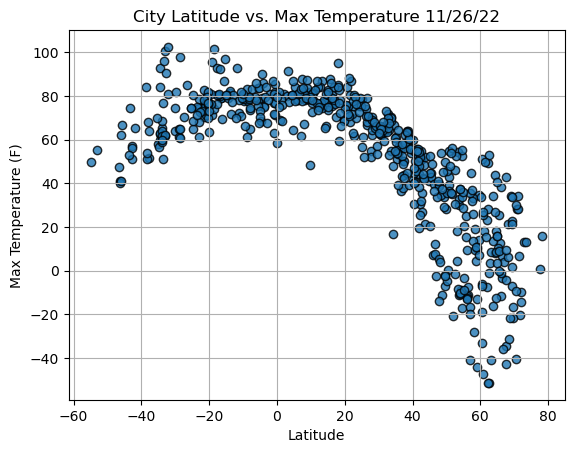

In [61]:
# Import the time module
import time

# Build the scatter plot for latitiude vs. longitude
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig1.png")

# Showing the plot
plt.show()

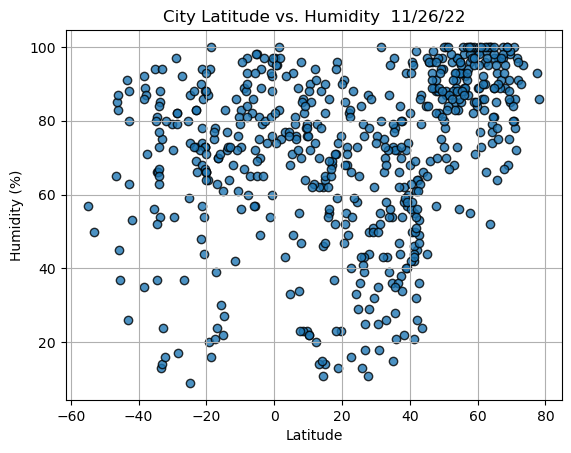

In [62]:
# Build the scatter plot for latitiude vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Humidity  " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig2.png")

# Showing the plot
plt.show()

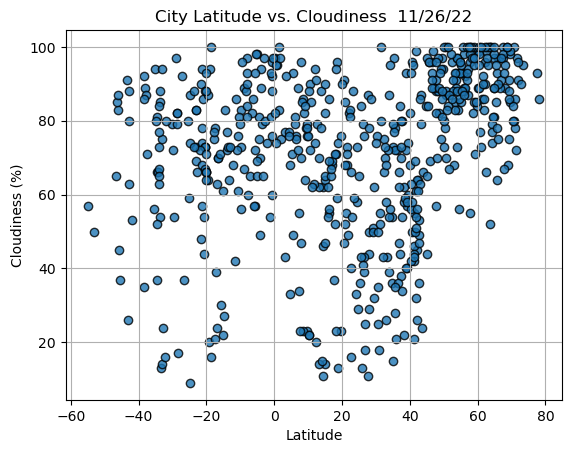

In [63]:
# Build the scatter plot for latitiude vs. cloudiness
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Cloudiness  " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig3.png")

# Showing the plot
plt.show()

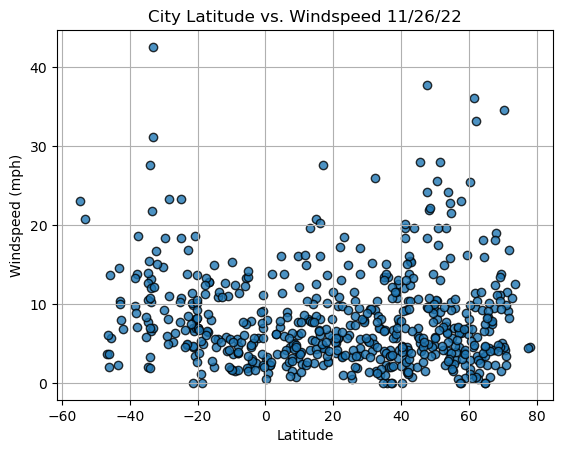

In [64]:
# Build the scatter plot for latitiude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Windspeed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig4.png")

# Showing the plot
plt.show()

In [65]:
# Importing linregress
from scipy.stats import linregress


# Creating a function to perform linear regression on the weather data
# and plot the data, the linear regression line, and the equation of the linear regression line
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [84]:
# Creating the Northern and Southern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [99]:
display(northern_hemi_df.head(2))
display(southern_hemi_df.head(2))

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Najran,SA,2022-11-26 17:44:38,17.4924,44.1277,70.45,37,62,4.43
6,Tuktoyaktuk,CA,2022-11-26 17:48:46,69.4541,-133.0374,1.40,85,100,13.80


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-11-26 17:48:43,-23.1203,-134.9692,74.52,73,70,4.79
1,Vaini,TO,2022-11-26 17:48:44,-21.2000,-175.2000,77.16,94,40,4.61


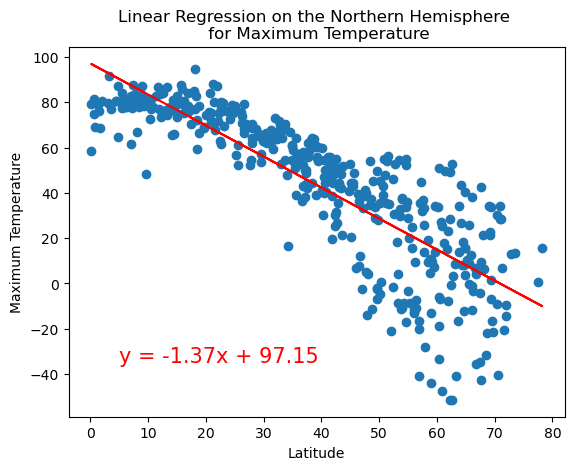

In [124]:
# Linear regression on the Northern Hemisphere for max temp

lat_values_north = northern_hemi_df["Lat"]
temp_values_north = northern_hemi_df["Max Temp"]

# Calling our function
plot_linear_regression(lat_values_north, temp_values_north,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Maximum Temperature", (5, -35))

In [125]:
# Checking r-values
linregress(lat_values_north, temp_values_north)

LinregressResult(slope=-1.370316714088215, intercept=97.15160082674167, rvalue=-0.8313273156017891, pvalue=3.3890609562429714e-109, stderr=0.04470227480661758, intercept_stderr=1.966657623123509)

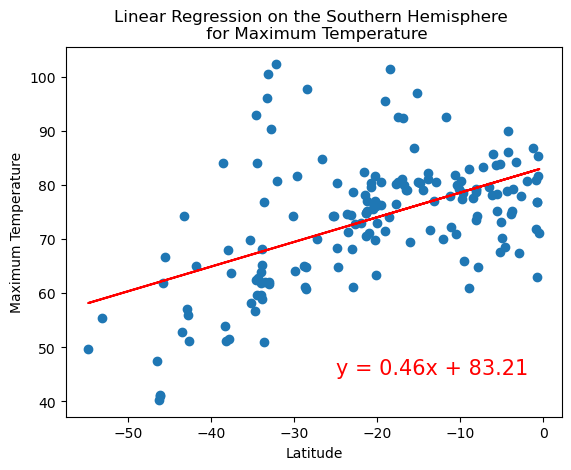

In [126]:
# Linear regression on the Southern Hemisphere for max temp
lat_values_south = southern_hemi_df["Lat"]
temp_values_south = southern_hemi_df["Max Temp"]

# Calling our function
plot_linear_regression(lat_values_south, temp_values_south,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                      "Maximum Temperature", (-25, 45))

In [127]:
# Checking r-values
linregress(lat_values_south, temp_values_south)

LinregressResult(slope=0.4562169833939911, intercept=83.21128448623551, rvalue=0.513368076086006, pvalue=1.3019619379802124e-12, stderr=0.05937084091159911, intercept_stderr=1.4562240576922332)

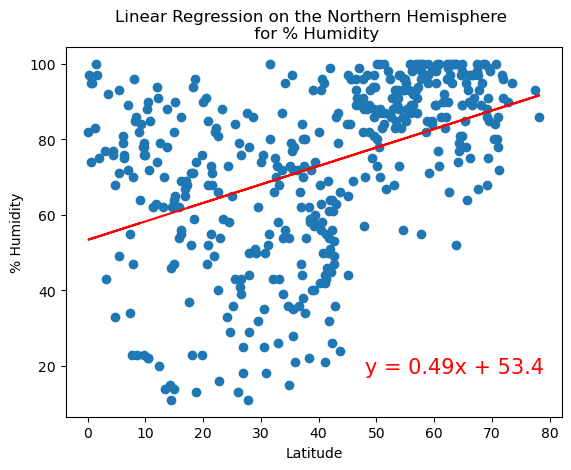

In [128]:
# Linear regression on the Northern Hemisphere for percent humidity
lat_values_north = northern_hemi_df["Lat"]
humidity_values_north = northern_hemi_df["Humidity"]

# Calling our function
plot_linear_regression(lat_values_north, humidity_values_north, 
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity", (48, 18))

In [129]:
# Checking r-values
linregress(lat_values_north, humidity_values_north)

LinregressResult(slope=0.48950433556458467, intercept=53.39536177047472, rvalue=0.42757419011162506, pvalue=3.4779114487802735e-20, stderr=0.05049860291037523, intercept_stderr=2.2216646199865075)

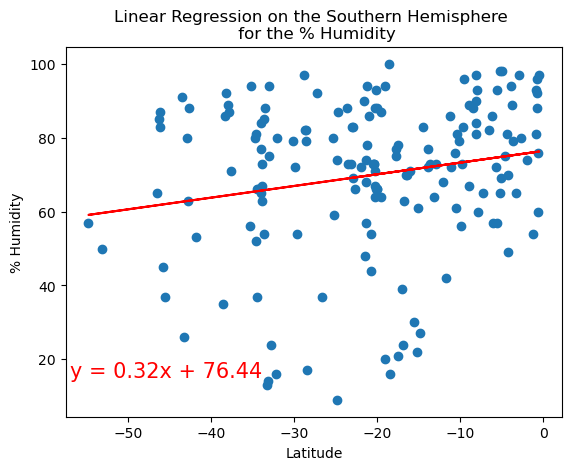

In [130]:
# Linear regression on the Southern Hemisphere for the percent humidity
lat_values_south = southern_hemi_df["Lat"]
humidity_values_south = southern_hemi_df["Humidity"]

# Calling our function
plot_linear_regression(lat_values_south, humidity_values_south, 
                       "Linear Regression on the Southern Hemisphere \n for the % Humidity",
                      "% Humidity", (-57, 15))

In [131]:
# Checking r-values
linregress(lat_values_south, humidity_values_south)

LinregressResult(slope=0.31621281720586497, intercept=76.43792155094474, rvalue=0.1977918526018533, pvalue=0.010401139373187636, stderr=0.12200097757221531, intercept_stderr=2.9923908079247274)

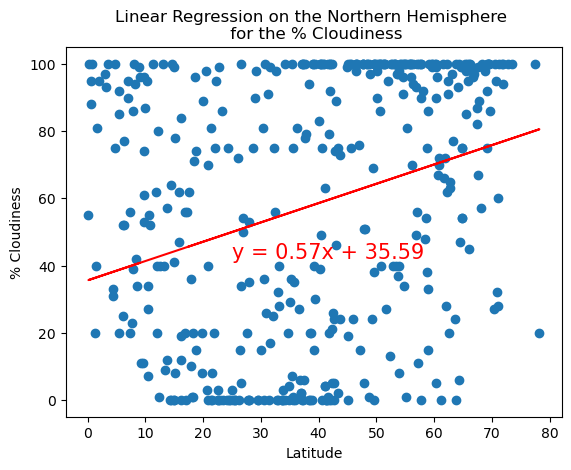

In [132]:
# Linear regression on the Northern Hemisphere for the percent cloudiness
lat_values_north = northern_hemi_df["Lat"]
cloudiness_values_north = northern_hemi_df["Cloudiness"]

# Calling our function
plot_linear_regression(lat_values_north, cloudiness_values_north, 
                       "Linear Regression on the Northern Hemisphere \n for the % Cloudiness",
                      "% Cloudiness", (25, 42))

In [137]:
# Checking r-values
linregress(lat_values_north, cloudiness_values_north)

LinregressResult(slope=0.574786622995391, intercept=35.59162239886888, rvalue=0.2942935656522407, pvalue=7.062673876929296e-10, stderr=0.09108139524421666, intercept_stderr=4.007087358678373)

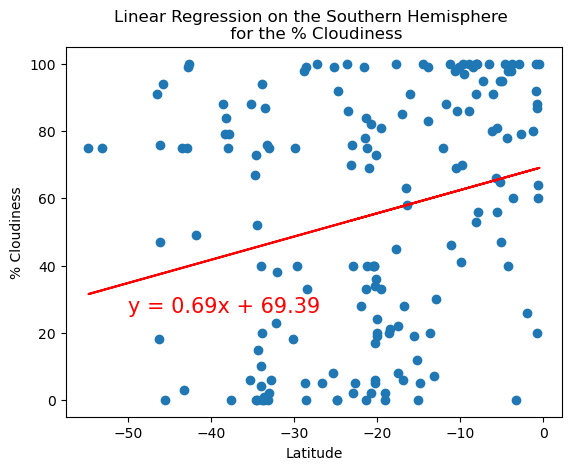

In [136]:
# Linear regression on the Southern Hemisphere for the percent cloudiness
lat_values_south = southern_hemi_df["Lat"]
cloudiness_values_south = southern_hemi_df["Cloudiness"]

# Calling our function
plot_linear_regression(lat_values_south, cloudiness_values_south, "Linear Regression on the Southern Hemisphere \n for the % Cloudiness",
                      "% Cloudiness", (-50, 26))

In [138]:
# Checking r-values
linregress(lat_values_south, cloudiness_values_south)

LinregressResult(slope=0.691522201742394, intercept=69.39218147539273, rvalue=0.247970687238377, pvalue=0.0012334315026175777, stderr=0.21032136270849489, intercept_stderr=5.158677618845858)

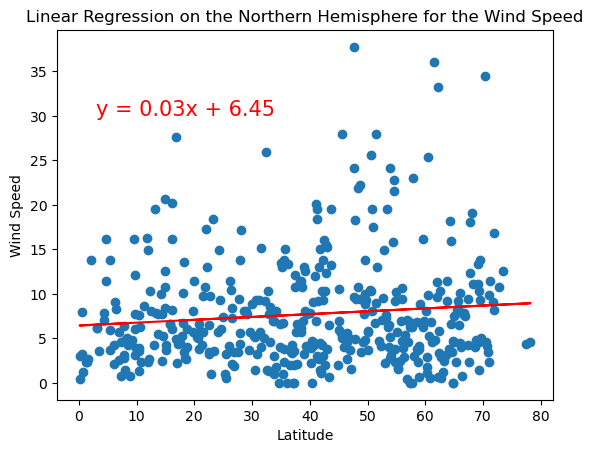

In [142]:
# Linear regression on the Northern Hemisphere for the wind speed
lat_values_north = northern_hemi_df["Lat"]
wind_values_north = northern_hemi_df["Wind Speed"]

# Calling our function
plot_linear_regression(lat_values_north, wind_values_north, "Linear Regression on the Northern Hemisphere for the Wind Speed",
                      "Wind Speed", (3, 30))

In [151]:
# Checking r-values
linregress(lat_values_north, wind_values_north)

LinregressResult(slope=0.031994797437367085, intercept=6.448489920692415, rvalue=0.10477759500547078, pvalue=0.03140126472558158, stderr=0.014817986491278445, intercept_stderr=0.6519110317871308)

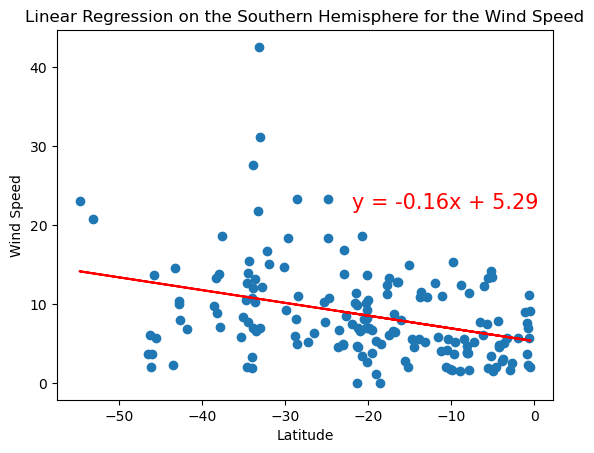

In [150]:
# Linear regression on the Southern Hemisphere for the wind speed
lat_values_south = southern_hemi_df["Lat"]
wind_values_south = southern_hemi_df["Wind Speed"]

# Calling our function
plot_linear_regression(lat_values_south, wind_values_south, "Linear Regression on the Southern Hemisphere for the Wind Speed",
                      "Wind Speed", (-22, 22))

In [152]:
# Checking r-values
linregress(lat_values_south, wind_values_south)

LinregressResult(slope=-0.1615966361113158, intercept=5.288639577939493, rvalue=-0.34821269207135236, pvalue=4.002595549307433e-06, stderr=0.03386709160381012, intercept_stderr=0.8306783734285935)